In [1]:
import sys
!{sys.executable} -m pip install google_images_download pytesseract opencv-python

    100% |████████████████████████████████| 174kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 25.0MB 464kB/s ta 0:00:011   43% |██████████████                  | 11.0MB 3.6MB/s eta 0:00:04    62% |███████████████████▉            | 15.5MB 6.3MB/s eta 0:00:02    65% |█████████████████████▏          | 16.5MB 5.0MB/s eta 0:00:02    90% |█████████████████████████████   | 22.6MB 6.5MB/s eta 0:00:01    95% |██████████████████████████████▋ | 23.9MB 6.7MB/s eta 0:00:01    99% |████████████████████████████████| 25.0MB 7.9MB/s eta 0:00:01
    100% |████████████████████████████████| 911kB 19.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for google-images-download ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
  Running setup.py bdist_wheel for pytesseract ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/df/0f/58/4577e860a694ad2a77cddf2f17bb77e9d21ad7f0758a4bc6f9
Successfully built google-

In [14]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()

def get_image(kw): 
    arguments = {"keywords": kw, "limit": 1}
    absolute_image_paths = response.download(arguments)
    return absolute_image_paths

import cv2 as cv
from matplotlib import pyplot as plt
import pytesseract

def grid_display(list_of_images, list_of_titles=[], no_of_columns=4, figsize=(20,3)):

    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        
        
        
        img = cv.imread(list_of_images[i])
        rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        plt.imshow(rgb_img)
        plt.axis('off')
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i])
            
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))            
            
import requests, json

def random_user_reccom():
    url = 'http://docker.for.mac.localhost:8080/user/random'
    r = requests.get(url)
    data = json.loads(r.content.decode())

    printmd('**Response:**')
    print(json.dumps(data, indent=4, sort_keys=True))
    return data
    
def display_user_history(data):
    history_titles = list(data.get("history")[:12])
    with suppress_stdout():
        history_image_links = list(map(lambda x: next(iter(next(iter(get_image(x).values())))), history_titles))
  
    printmd('**User {} history (top 12):**'.format(data.get("id")))
    grid_display(history_image_links, history_titles) 
    
def display_user_reccom(data):
    titles = list(map(lambda x: "{} - {}".format(x.get("title")[:25], str(x.get("score"))[:4]), data.get("scores")[:8]))
    with suppress_stdout():
        image_links = list(map(lambda x: next(iter(next(iter(get_image(x.get("title")).values())))), data.get("scores")[:8]))
    
    printmd('**Recommendations for user {}:**'.format(data.get("id")))
    grid_display(image_links, titles) 


from IPython.core.display import Image, display
def random_item_reccom():
    url = 'http://docker.for.mac.localhost:8080/item/random'
    r = requests.get(url)
    data = json.loads(r.content.decode())

    printmd('**Response:**')
    print(json.dumps(data, indent=4, sort_keys=True))

    titles = list(map(lambda x: "{} - {}".format(x.get("title")[:25], str(x.get("score"))[:4]), data.get("scores")[:8]))
    with suppress_stdout():
        image_links = list(map(lambda x: next(iter(next(iter(get_image(x.get("title")).values())))), data.get("scores")[:8]))
        item_url = next(iter(next(iter(get_image(data.get("movie")).values()))))
        display(Image(item_url, width=100, unconfined=True))
    
    printmd('**Recommendations for {}:**'.format(data.get("movie")))
    grid_display(image_links, titles) 


In [15]:
user_data = random_user_reccom()

**Response:**

{
    "history": [
        "Eyes Wide Shut (1999)",
        "Eternal Sunshine of the Spotless Mind (2004)",
        "Kids (1995)",
        "Braveheart (1995)",
        "Forrest Gump (1994)",
        "Anchorman: The Legend of Ron Burgundy (2004)",
        "Das Experiment (Experiment, The) (2001)",
        "Green Mile, The (1999)",
        "American Beauty (1999)",
        "Requiem for a Dream (2000)",
        "Austin Powers: International Man of Mystery (1997)",
        "American History X (1998)",
        "Grand Day Out with Wallace and Gromit, A (1989)",
        "Memento (2000)",
        "Pulp Fiction (1994)",
        "Other Guys, The (2010)",
        "Beavis and Butt-Head Do America (1996)",
        "Austin Powers: The Spy Who Shagged Me (1999)",
        "Weekend at Bernie's (1989)",
        "NeverEnding Story, The (1984)",
        "Mist, The (2007)",
        "Fargo (1996)",
        "Toy Story (1995)",
        "Robin Hood: Men in Tights (1993)",
        "I Know What You Did Last Summ

**User 124 history (top 12):**

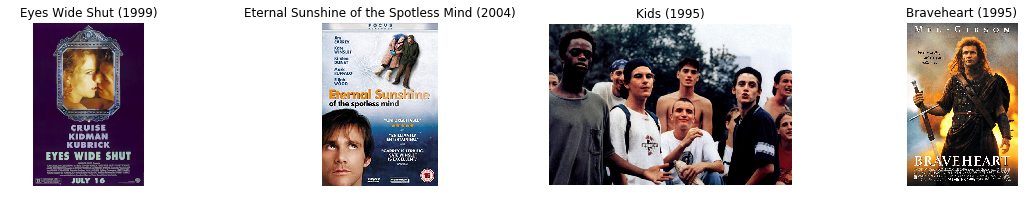

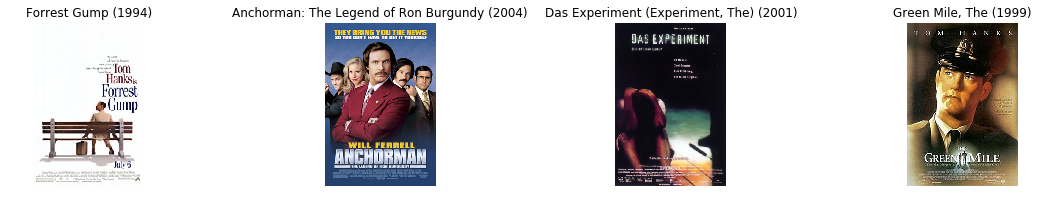

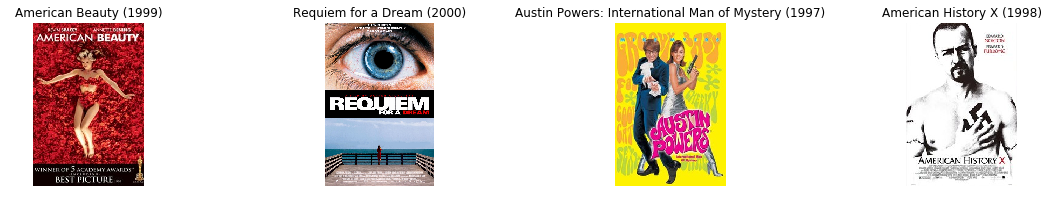

In [16]:
display_user_history(user_data)

**Recommendations for user 124:**

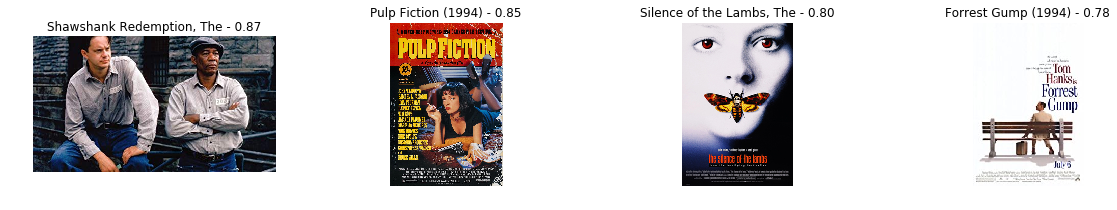

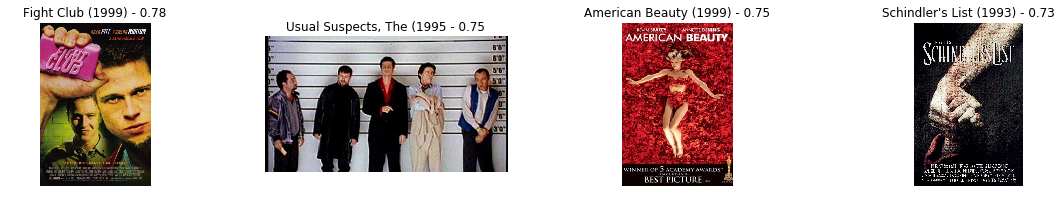

In [17]:
display_user_reccom(user_data)